In [4]:
import datetime

import numpy as np
import pandas_datareader.data as web
import yfinance as yfin
from IPython.display import VimeoVideo

yfin.pdr_override()

In [5]:
start = datetime.date(2016, 11, 16)
end = datetime.date.today()

df = web.DataReader(["TLT", "TSLA", "BTC-USD"], start, end)["Adj Close"]

[*********************100%***********************]  3 of 3 completed


In [6]:
df.head(10)

,BTC-USD,TLT,TSLA
Date,,,
2016-11-15,711.619019,104.488899,12.251333
2016-11-16,744.197998,105.431694,12.262000
2016-11-17,740.976990,103.880318,12.577333
2016-11-18,751.585022,103.580391,12.334667
2016-11-19,751.616028,NaN,NaN
2016-11-20,731.026001,NaN,NaN
2016-11-21,739.247986,103.837532,12.301333
2016-11-22,751.346985,103.803215,12.744667
2016-11-23,744.593994,103.400391,12.876000


In [7]:
df.describe()

,BTC-USD,TLT,TSLA
count,2494.000000,1717.000000,1717.000000
mean,18195.444895,120.003664,121.094496
std,16129.295648,18.001930,113.657290
min,711.619019,89.809021,11.931333
25%,6517.212646,105.287766,20.724001
50%,10517.714844,111.338867,51.919998
75%,28023.754395,134.480072,225.666672
max,67566.828125,160.762756,409.970001


<AxesSubplot:xlabel='Date'>

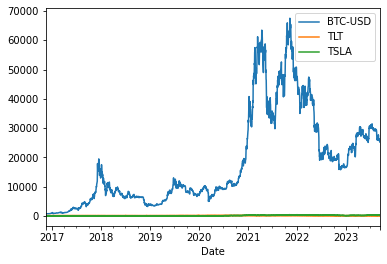

In [8]:
df.plot()

<AxesSubplot:xlabel='Date'>

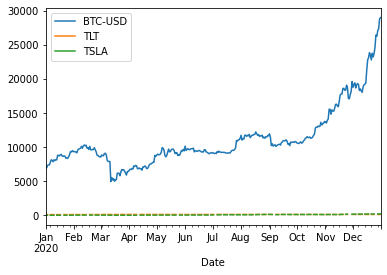

In [9]:
df["2020-01-01":"2020-12-31"].plot()

In [10]:
df = df.join(web.DataReader(["BLV"], start, end)["Adj Close"])
df.rename(columns = {"Adj Close": "BLV"}, inplace=True)
df.head()

[*********************100%***********************]  1 of 1 completed


,BTC-USD,TLT,TSLA,BLV
Date,,,,
2016-11-15,711.619019,104.488899,12.251333,68.119095
2016-11-16,744.197998,105.431694,12.262000,68.451927
2016-11-17,740.976990,103.880318,12.577333,67.687927
2016-11-18,751.585022,103.580391,12.334667,67.317230
2016-11-19,751.616028,NaN,NaN,NaN


In [11]:
df = df.dropna()
# Make dataframe consist of log returns
df["Bitcoin"] = np.log(df["BTC-USD"]) - np.log(df["BTC-USD"].shift(1))
df["TLT"] = np.log(df["TLT"]) - np.log(df["TLT"].shift(1))
df["Tesla"] = np.log(df["TSLA"]) - np.log(df["TSLA"].shift(1))
df = df.drop(["BTC-USD", "TSLA", "BLV"], axis = 1)
df.head()

,TLT,Bitcoin,Tesla
Date,,,
2016-11-15,NaN,NaN,NaN
2016-11-16,0.008982,0.044764,0.000870
2016-11-17,-0.014824,-0.004338,0.025391
2016-11-18,-0.002891,0.014215,-0.019482
2016-11-21,0.002479,-0.016551,-0.002706


In [12]:
df.describe()

,TLT,Bitcoin,Tesla
count,1716.000000,1716.000000,1716.000000
mean,-0.000060,0.002102,0.001805
std,0.009686,0.046631,0.038217
min,-0.069011,-0.464730,-0.236518
25%,-0.005634,-0.016740,-0.016649
50%,0.000248,0.001918,0.001560
75%,0.005348,0.022711,0.020284
max,0.072503,0.225119,0.181445


In [13]:
np.log(850) - np.log(500)

0.5306282510621712

In [15]:
100 * (1 + 0.03)**10

134.39163793441222

In [16]:
df.describe()

,TLT,Bitcoin,Tesla
count,1716.000000,1716.000000,1716.000000
mean,-0.000060,0.002102,0.001805
std,0.009686,0.046631,0.038217
min,-0.069011,-0.464730,-0.236518
25%,-0.005634,-0.016740,-0.016649
50%,0.000248,0.001918,0.001560
75%,0.005348,0.022711,0.020284
max,0.072503,0.225119,0.181445
